In [9]:
import numpy as np
import open3d as o3d
import os
import matplotlib.pyplot as plt

notebook_dir = os.getcwd()
parent_dir = os.path.dirname(notebook_dir)

image_save = os.path.join(parent_dir, 'docs', 'images', 'Synthetic_Plant_Non_Plant.png')


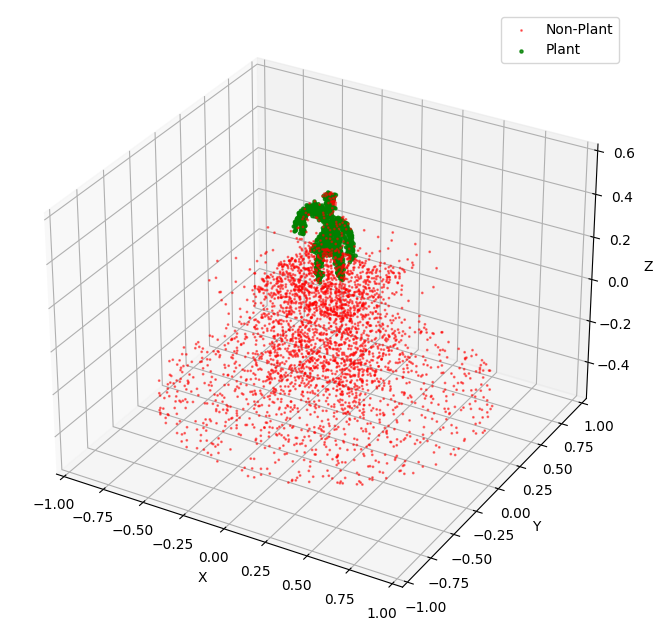

In [10]:
file_name = os.path.join(parent_dir, 'data', 'Sorghum_Plants_Point_Cloud_Data', 'synthetic_proc', 'labeled_plant01_synthetic.npz')
data = np.load(file_name)
points = data['points'] 
labels = data['labels']

##############################
# 12. Visualization          #
##############################
def visualize_points(points, labels, title="Plant/Non-Plant"):
    from mpl_toolkits.mplot3d import Axes3D
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    plant_mask = (labels.flatten() == 1)
    non_plant_mask = (labels.flatten() == 0)
    
    ax.scatter(points[non_plant_mask, 0],
               points[non_plant_mask, 1],
               points[non_plant_mask, 2],
               c='red', s=1, alpha=0.5, label='Non-Plant')
    ax.scatter(points[plant_mask, 0],
               points[plant_mask, 1],
               points[plant_mask, 2],
               c='green', s=5, alpha=0.8, label='Plant')
    
    #ax.set_title(title)
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")
    ax.legend()
    plt.savefig(image_save)
    plt.show()

def visualize_open3d(points, labels, title="Plant/Non-Plant"):
    pcd = o3d.geometry.PointCloud()
    pcd.points = o3d.utility.Vector3dVector(points)
    
    colors = np.zeros_like(points)
    plant_mask = (labels.flatten() == 1)
    non_plant_mask = (labels.flatten() == 0)
    colors[plant_mask] = [0, 1, 0]
    colors[non_plant_mask] = [1, 0, 0]
    
    pcd.colors = o3d.utility.Vector3dVector(colors)
    o3d.visualization.draw_geometries([pcd], window_name=title)

# Visualize
visualize_points(points, labels, "Plant with Synthetic Artifacts")
visualize_open3d(points, labels, "Plant/Non-Plant 3D View")